# Charting PYLON Analysis Results

When you perform analysis with PYLON you receive aggregated results from the API. 

We carry out much of work with PYLON in iPython as by its nature the results is a documented workflow that can be easily shared.

In this notebook we'll take a look at how you can use common Python libraries to chart analysis results. For each scenario we'll declare a function that we can reuse in future.

## Environment

To create this notebook we used:

* Python 2.7.6
* iPython 4.0.0
* pandas
* [DataSift client library](http://dev.datasift.com/tools/client-libraries)

The best way to install the above requirements is using [Anaconda](https://www.continuum.io/downloads). Anaconda provides a tested installation bundle including most popular Python packages.

## Working with Python dictionaries

When you perform analysis with PYLON your result will be returned from the API as JSON. The DataSift client library will parse the result into a dictionary for you.

This code illustrates this for a time series analysis. Essentially when you're working with results you'll be working with a Python dictionary.

In [2]:
import json

ts_api_result = '''{
    "interactions": 3188400,
    "unique_authors": 2234300,
    "analysis": {
        "analysis_type": "timeSeries",
        "parameters": {
            "interval": "day"
        },
        "results": [
            {
                "key": 1448496000,
                "interactions": 312200,
                "unique_authors": 259900
            },
            {
                "key": 1448582400,
                "interactions": 539700,
                "unique_authors": 414100
            },
            {
                "key": 1448668800,
                "interactions": 578600,
                "unique_authors": 475600
            },
            {
                "key": 1448755200,
                "interactions": 561000,
                "unique_authors": 439600
            },
            {
                "key": 1448841600,
                "interactions": 588600,
                "unique_authors": 495500
            },
            {
                "key": 1448928000,
                "interactions": 608100,
                "unique_authors": 496800
            }
        ],
        "redacted": false
    }
}'''

ts_result = json.loads(ts_api_result)

print ts_result

{u'analysis': {u'analysis_type': u'timeSeries', u'redacted': False, u'results': [{u'unique_authors': 259900, u'key': 1448496000, u'interactions': 312200}, {u'unique_authors': 414100, u'key': 1448582400, u'interactions': 539700}, {u'unique_authors': 475600, u'key': 1448668800, u'interactions': 578600}, {u'unique_authors': 439600, u'key': 1448755200, u'interactions': 561000}, {u'unique_authors': 495500, u'key': 1448841600, u'interactions': 588600}, {u'unique_authors': 496800, u'key': 1448928000, u'interactions': 608100}], u'parameters': {u'interval': u'day'}}, u'unique_authors': 2234300, u'interactions': 3188400}


## Charting time series results

So the result of a time series analysis will be returned as a dictionary. 

Before you plot a chart you'll first want to check that the entire analysis has not been **redacted** and your dictionary contains results. You can check this using the 'redacted' flag in the dictionary.

Assuming you have results you'll net need to convert the results array into a Pandas dataframe. Use 'key' as the index value as this is the timestamp for each timeseries interval.

To plot the chart we first sort the data in the dataframe, and then call plot. Pandas takes care of the rest. In this example we specify the size of the chart using 'figsize' but this is optional.

Populating the interactive namespace from numpy and matplotlib


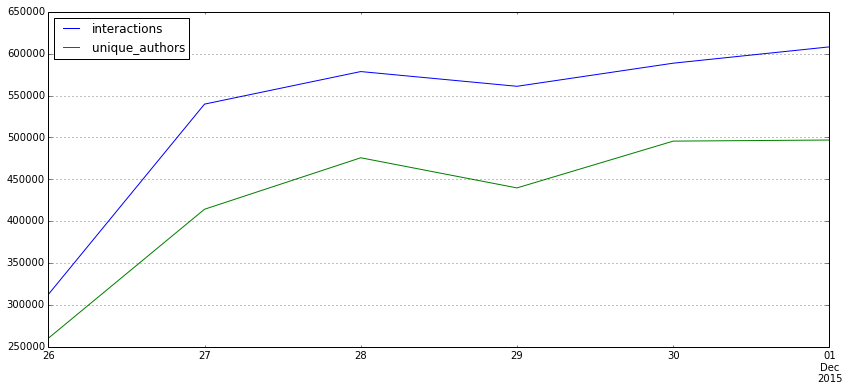

In [3]:
# This causes charts to be drawn inline
%pylab inline

# Import pandas for data manipulation
import pandas as pd

# Plots a timeseries from an timeseries API response
def chart_timeseries(ts_result):

    # Check result is not redacted
    if not ts_result['analysis']['redacted']:

        # Extract result data to dataframe
        ts_df = pd.DataFrame.from_records(ts_result['analysis']['results'],index='key')

        # Map the index labels to readable dates
        ts_df.index=ts_df.index.map(datetime.datetime.fromtimestamp)

        # Sort the data and plot a chart
        ts_df.sort().plot(figsize=(14,6))
        
chart_timeseries(ts_result)

## Charting frequency distribution results

Before we look at an example chart, let's first parse some example JSON returned from the API for a frequency distribution analysis into a dictionary.

In [3]:
fd_api_result = '''{
    "interactions": 3188400,
    "unique_authors": 2234300,
    "analysis": {
        "analysis_type": "freqDist",
        "parameters": {
            "target": "fb.author.country",
            "threshold": 6
        },
        "results": [
            {
                "key": "United States",
                "interactions": 1121300,
                "unique_authors": 781400
            },
            {
                "key": "Brazil",
                "interactions": 283100,
                "unique_authors": 204800
            },
            {
                "key": "Turkey",
                "interactions": 181000,
                "unique_authors": 136700
            },
            {
                "key": "United Kingdom",
                "interactions": 172800,
                "unique_authors": 128400
            },
            {
                "key": "Mexico",
                "interactions": 151200,
                "unique_authors": 95000
            },
            {
                "key": "Germany",
                "interactions": 122000,
                "unique_authors": 84800
            }
        ],
        "redacted": false
    }
}'''

fd_result = json.loads(fd_api_result)

print fd_result

{u'analysis': {u'analysis_type': u'freqDist', u'redacted': False, u'results': [{u'unique_authors': 781400, u'key': u'United States', u'interactions': 1121300}, {u'unique_authors': 204800, u'key': u'Brazil', u'interactions': 283100}, {u'unique_authors': 136700, u'key': u'Turkey', u'interactions': 181000}, {u'unique_authors': 128400, u'key': u'United Kingdom', u'interactions': 172800}, {u'unique_authors': 95000, u'key': u'Mexico', u'interactions': 151200}, {u'unique_authors': 84800, u'key': u'Germany', u'interactions': 122000}], u'parameters': {u'threshold': 6, u'target': u'fb.author.country'}}, u'unique_authors': 2234300, u'interactions': 3188400}


Again, before you plot the chart make sure the analysis has not been redacted.

Next, extract the data from the results array into a pandas dataframe.

You can now plot the chart. Here we've sorted the results by the 'unique_authors' column to present the results in an intuitive order. We've also specified 'barh' for the type of plot as a horizontal bar chart displays nicely inside a workbook.

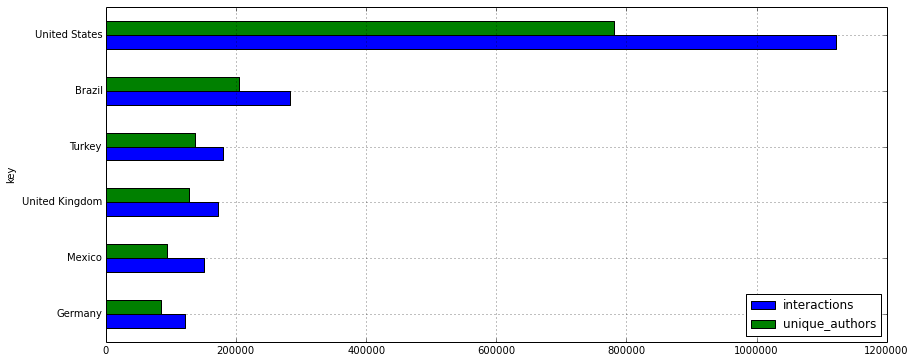

In [4]:
def chart_freqdist(fd_result):
    
    # Check result is not redacted
    if not fd_result['analysis']['redacted']:

        # Extract result data to dataframe
        fd_df = pd.DataFrame.from_records(fd_result['analysis']['results'],index='key')

        # Sort the data and plot a chart
        fd_df.sort(columns=['unique_authors']).plot(kind='barh',figsize=(14,6))
        
chart_freqdist(fd_result)

## Aggregating and plotting time series results

It can be useful to aggregate results before plotting to reveal different ingsights. For example, imagine you want to investigate what time of the day an audience discusses a topic. In this case you would need to aggregate the number of interactions (or unique authors) by each hour of the day over a time series and plot the result. This is easy in Python.

For this example we'll need a time series result that covers multiple days.

In [4]:
multi_days_api_result = '''
{"unique_authors": 59100, "analysis": {"analysis_type": "timeSeries", "redacted": false, "results": [{"unique_authors": 200, "key": 1448841600, "interactions": 200}, {"unique_authors": 300, "key": 1448845200, "interactions": 400}, {"unique_authors": 300, "key": 1448848800, "interactions": 400}, {"unique_authors": 400, "key": 1448852400, "interactions": 400}, {"unique_authors": 300, "key": 1448856000, "interactions": 400}, {"unique_authors": 200, "key": 1448859600, "interactions": 300}, {"unique_authors": 200, "key": 1448863200, "interactions": 200}, {"unique_authors": 100, "key": 1448866800, "interactions": 100}, {"unique_authors": 100, "key": 1448895600, "interactions": 100}, {"unique_authors": 200, "key": 1448899200, "interactions": 200}, {"unique_authors": 200, "key": 1448902800, "interactions": 200}, {"unique_authors": 200, "key": 1448906400, "interactions": 200}, {"unique_authors": 200, "key": 1448910000, "interactions": 300}, {"unique_authors": 200, "key": 1448913600, "interactions": 300}, {"unique_authors": 100, "key": 1448917200, "interactions": 200}, {"unique_authors": 200, "key": 1448920800, "interactions": 200}, {"unique_authors": 100, "key": 1448924400, "interactions": 100}, {"unique_authors": 200, "key": 1448928000, "interactions": 200}, {"unique_authors": 200, "key": 1448931600, "interactions": 200}, {"unique_authors": 200, "key": 1448935200, "interactions": 300}, {"unique_authors": 300, "key": 1448938800, "interactions": 300}, {"unique_authors": 300, "key": 1448942400, "interactions": 300}, {"unique_authors": 200, "key": 1448946000, "interactions": 200}, {"unique_authors": 200, "key": 1448949600, "interactions": 200}, {"unique_authors": 100, "key": 1448953200, "interactions": 100}, {"unique_authors": 100, "key": 1448982000, "interactions": 100}, {"unique_authors": 100, "key": 1448985600, "interactions": 200}, {"unique_authors": 100, "key": 1448989200, "interactions": 100}, {"unique_authors": 100, "key": 1448992800, "interactions": 200}, {"unique_authors": 100, "key": 1448996400, "interactions": 200}, {"unique_authors": 100, "key": 1449000000, "interactions": 100}, {"unique_authors": 100, "key": 1449003600, "interactions": 100}, {"unique_authors": 100, "key": 1449007200, "interactions": 200}, {"unique_authors": 100, "key": 1449010800, "interactions": 200}, {"unique_authors": 200, "key": 1449014400, "interactions": 200}, {"unique_authors": 200, "key": 1449018000, "interactions": 200}, {"unique_authors": 200, "key": 1449021600, "interactions": 200}, {"unique_authors": 200, "key": 1449025200, "interactions": 200}, {"unique_authors": 200, "key": 1449028800, "interactions": 200}, {"unique_authors": 200, "key": 1449032400, "interactions": 200}, {"unique_authors": 200, "key": 1449036000, "interactions": 200}, {"unique_authors": 100, "key": 1449064800, "interactions": 100}, {"unique_authors": 100, "key": 1449068400, "interactions": 100}, {"unique_authors": 100, "key": 1449072000, "interactions": 200}, {"unique_authors": 100, "key": 1449075600, "interactions": 200}, {"unique_authors": 100, "key": 1449079200, "interactions": 200}, {"unique_authors": 200, "key": 1449082800, "interactions": 200}, {"unique_authors": 100, "key": 1449086400, "interactions": 100}, {"unique_authors": 100, "key": 1449090000, "interactions": 100}, {"unique_authors": 200, "key": 1449093600, "interactions": 200}, {"unique_authors": 300, "key": 1449097200, "interactions": 300}, {"unique_authors": 200, "key": 1449100800, "interactions": 200}, {"unique_authors": 200, "key": 1449104400, "interactions": 300}, {"unique_authors": 300, "key": 1449108000, "interactions": 400}, {"unique_authors": 300, "key": 1449111600, "interactions": 300}, {"unique_authors": 100, "key": 1449154800, "interactions": 100}, {"unique_authors": 100, "key": 1449158400, "interactions": 100}, {"unique_authors": 200, "key": 1449162000, "interactions": 200}, {"unique_authors": 200, "key": 1449165600, "interactions": 300}, {"unique_authors": 200, "key": 1449169200, "interactions": 200}, {"unique_authors": 200, "key": 1449172800, "interactions": 200}, {"unique_authors": 100, "key": 1449176400, "interactions": 200}, {"unique_authors": 200, "key": 1449180000, "interactions": 200}, {"unique_authors": 200, "key": 1449183600, "interactions": 300}, {"unique_authors": 200, "key": 1449187200, "interactions": 200}, {"unique_authors": 300, "key": 1449190800, "interactions": 400}, {"unique_authors": 300, "key": 1449194400, "interactions": 300}, {"unique_authors": 300, "key": 1449198000, "interactions": 300}, {"unique_authors": 300, "key": 1449201600, "interactions": 400}, {"unique_authors": 300, "key": 1449205200, "interactions": 300}, {"unique_authors": 100, "key": 1449216000, "interactions": 100}, {"unique_authors": 100, "key": 1449237600, "interactions": 100}, {"unique_authors": 100, "key": 1449241200, "interactions": 200}, {"unique_authors": 200, "key": 1449244800, "interactions": 200}, {"unique_authors": 200, "key": 1449248400, "interactions": 300}, {"unique_authors": 200, "key": 1449252000, "interactions": 200}, {"unique_authors": 200, "key": 1449255600, "interactions": 200}, {"unique_authors": 200, "key": 1449259200, "interactions": 200}, {"unique_authors": 200, "key": 1449262800, "interactions": 200}, {"unique_authors": 200, "key": 1449266400, "interactions": 300}, {"unique_authors": 300, "key": 1449270000, "interactions": 300}, {"unique_authors": 300, "key": 1449273600, "interactions": 400}, {"unique_authors": 600, "key": 1449277200, "interactions": 600}, {"unique_authors": 500, "key": 1449280800, "interactions": 600}, {"unique_authors": 400, "key": 1449284400, "interactions": 500}, {"unique_authors": 400, "key": 1449288000, "interactions": 400}, {"unique_authors": 400, "key": 1449291600, "interactions": 400}, {"unique_authors": 200, "key": 1449295200, "interactions": 200}, {"unique_authors": 100, "key": 1449298800, "interactions": 100}, {"unique_authors": 300, "key": 1449302400, "interactions": 300}, {"unique_authors": 100, "key": 1449306000, "interactions": 100}, {"unique_authors": 100, "key": 1449324000, "interactions": 200}, {"unique_authors": 300, "key": 1449327600, "interactions": 300}, {"unique_authors": 400, "key": 1449331200, "interactions": 400}, {"unique_authors": 400, "key": 1449334800, "interactions": 500}, {"unique_authors": 400, "key": 1449338400, "interactions": 500}, {"unique_authors": 400, "key": 1449342000, "interactions": 400}, {"unique_authors": 300, "key": 1449345600, "interactions": 400}, {"unique_authors": 400, "key": 1449349200, "interactions": 400}, {"unique_authors": 400, "key": 1449352800, "interactions": 400}, {"unique_authors": 500, "key": 1449356400, "interactions": 500}, {"unique_authors": 500, "key": 1449360000, "interactions": 500}, {"unique_authors": 500, "key": 1449363600, "interactions": 500}, {"unique_authors": 500, "key": 1449367200, "interactions": 500}, {"unique_authors": 400, "key": 1449370800, "interactions": 500}, {"unique_authors": 500, "key": 1449374400, "interactions": 500}, {"unique_authors": 300, "key": 1449378000, "interactions": 300}, {"unique_authors": 100, "key": 1449381600, "interactions": 100}, {"unique_authors": 200, "key": 1449385200, "interactions": 200}, {"unique_authors": 100, "key": 1449388800, "interactions": 100}, {"unique_authors": 100, "key": 1449392400, "interactions": 100}, {"unique_authors": 100, "key": 1449414000, "interactions": 100}, {"unique_authors": 100, "key": 1449417600, "interactions": 200}, {"unique_authors": 200, "key": 1449421200, "interactions": 300}, {"unique_authors": 200, "key": 1449424800, "interactions": 300}, {"unique_authors": 200, "key": 1449428400, "interactions": 200}, {"unique_authors": 200, "key": 1449432000, "interactions": 200}, {"unique_authors": 200, "key": 1449435600, "interactions": 300}, {"unique_authors": 400, "key": 1449439200, "interactions": 400}, {"unique_authors": 300, "key": 1449442800, "interactions": 300}, {"unique_authors": 200, "key": 1449446400, "interactions": 300}, {"unique_authors": 200, "key": 1449450000, "interactions": 300}, {"unique_authors": 200, "key": 1449453600, "interactions": 300}, {"unique_authors": 200, "key": 1449457200, "interactions": 200}, {"unique_authors": 200, "key": 1449460800, "interactions": 200}, {"unique_authors": 200, "key": 1449464400, "interactions": 200}, {"unique_authors": 200, "key": 1449468000, "interactions": 200}, {"unique_authors": 100, "key": 1449471600, "interactions": 100}, {"unique_authors": 100, "key": 1449496800, "interactions": 100}, {"unique_authors": 100, "key": 1449500400, "interactions": 100}, {"unique_authors": 200, "key": 1449504000, "interactions": 200}, {"unique_authors": 200, "key": 1449507600, "interactions": 200}, {"unique_authors": 200, "key": 1449511200, "interactions": 200}, {"unique_authors": 300, "key": 1449514800, "interactions": 300}, {"unique_authors": 200, "key": 1449518400, "interactions": 300}, {"unique_authors": 200, "key": 1449522000, "interactions": 200}, {"unique_authors": 200, "key": 1449525600, "interactions": 200}, {"unique_authors": 300, "key": 1449529200, "interactions": 300}, {"unique_authors": 200, "key": 1449532800, "interactions": 300}, {"unique_authors": 300, "key": 1449536400, "interactions": 300}, {"unique_authors": 400, "key": 1449540000, "interactions": 500}, {"unique_authors": 300, "key": 1449543600, "interactions": 400}, {"unique_authors": 100, "key": 1449547200, "interactions": 200}, {"unique_authors": 100, "key": 1449561600, "interactions": 100}, {"unique_authors": 100, "key": 1449583200, "interactions": 100}, {"unique_authors": 100, "key": 1449586800, "interactions": 200}, {"unique_authors": 300, "key": 1449590400, "interactions": 300}, {"unique_authors": 300, "key": 1449594000, "interactions": 300}, {"unique_authors": 200, "key": 1449597600, "interactions": 300}, {"unique_authors": 200, "key": 1449601200, "interactions": 200}, {"unique_authors": 200, "key": 1449604800, "interactions": 200}, {"unique_authors": 200, "key": 1449608400, "interactions": 200}, {"unique_authors": 200, "key": 1449612000, "interactions": 300}, {"unique_authors": 200, "key": 1449615600, "interactions": 300}, {"unique_authors": 200, "key": 1449619200, "interactions": 300}, {"unique_authors": 400, "key": 1449622800, "interactions": 500}, {"unique_authors": 500, "key": 1449626400, "interactions": 500}, {"unique_authors": 300, "key": 1449630000, "interactions": 300}, {"unique_authors": 100, "key": 1449673200, "interactions": 100}, {"unique_authors": 100, "key": 1449676800, "interactions": 100}, {"unique_authors": 100, "key": 1449680400, "interactions": 200}, {"unique_authors": 200, "key": 1449684000, "interactions": 200}, {"unique_authors": 200, "key": 1449687600, "interactions": 200}, {"unique_authors": 200, "key": 1449691200, "interactions": 200}, {"unique_authors": 200, "key": 1449694800, "interactions": 200}, {"unique_authors": 100, "key": 1449698400, "interactions": 200}, {"unique_authors": 100, "key": 1449702000, "interactions": 200}, {"unique_authors": 200, "key": 1449705600, "interactions": 200}, {"unique_authors": 300, "key": 1449709200, "interactions": 300}, {"unique_authors": 200, "key": 1449712800, "interactions": 300}, {"unique_authors": 200, "key": 1449716400, "interactions": 200}, {"unique_authors": 100, "key": 1449759600, "interactions": 100}, {"unique_authors": 100, "key": 1449763200, "interactions": 100}, {"unique_authors": 100, "key": 1449766800, "interactions": 200}, {"unique_authors": 200, "key": 1449770400, "interactions": 300}, {"unique_authors": 100, "key": 1449774000, "interactions": 200}, {"unique_authors": 200, "key": 1449777600, "interactions": 200}, {"unique_authors": 200, "key": 1449781200, "interactions": 200}, {"unique_authors": 200, "key": 1449784800, "interactions": 200}, {"unique_authors": 200, "key": 1449788400, "interactions": 200}, {"unique_authors": 200, "key": 1449792000, "interactions": 200}, {"unique_authors": 200, "key": 1449795600, "interactions": 200}, {"unique_authors": 100, "key": 1449799200, "interactions": 100}, {"unique_authors": 100, "key": 1449849600, "interactions": 100}, {"unique_authors": 100, "key": 1449853200, "interactions": 100}, {"unique_authors": 100, "key": 1449856800, "interactions": 100}, {"unique_authors": 100, "key": 1449860400, "interactions": 200}, {"unique_authors": 100, "key": 1449864000, "interactions": 200}, {"unique_authors": 100, "key": 1449867600, "interactions": 200}, {"unique_authors": 100, "key": 1449871200, "interactions": 100}, {"unique_authors": 200, "key": 1449874800, "interactions": 200}, {"unique_authors": 100, "key": 1449878400, "interactions": 200}, {"unique_authors": 200, "key": 1449882000, "interactions": 300}, {"unique_authors": 200, "key": 1449885600, "interactions": 200}, {"unique_authors": 200, "key": 1449889200, "interactions": 200}, {"unique_authors": 200, "key": 1449892800, "interactions": 200}, {"unique_authors": 200, "key": 1449896400, "interactions": 200}, {"unique_authors": 200, "key": 1449900000, "interactions": 200}, {"unique_authors": 100, "key": 1449903600, "interactions": 100}, {"unique_authors": 100, "key": 1449932400, "interactions": 100}, {"unique_authors": 100, "key": 1449936000, "interactions": 100}, {"unique_authors": 100, "key": 1449939600, "interactions": 100}, {"unique_authors": 200, "key": 1449943200, "interactions": 200}, {"unique_authors": 100, "key": 1449946800, "interactions": 200}, {"unique_authors": 200, "key": 1449950400, "interactions": 200}, {"unique_authors": 200, "key": 1449954000, "interactions": 200}, {"unique_authors": 200, "key": 1449957600, "interactions": 200}, {"unique_authors": 200, "key": 1449961200, "interactions": 200}, {"unique_authors": 300, "key": 1449964800, "interactions": 400}, {"unique_authors": 300, "key": 1449968400, "interactions": 300}, {"unique_authors": 200, "key": 1449972000, "interactions": 300}, {"unique_authors": 300, "key": 1449975600, "interactions": 300}, {"unique_authors": 200, "key": 1449979200, "interactions": 200}, {"unique_authors": 200, "key": 1449982800, "interactions": 200}, {"unique_authors": 100, "key": 1449986400, "interactions": 200}, {"unique_authors": 100, "key": 1449993600, "interactions": 100}, {"unique_authors": 100, "key": 1450018800, "interactions": 100}, {"unique_authors": 100, "key": 1450022400, "interactions": 100}, {"unique_authors": 200, "key": 1450026000, "interactions": 200}, {"unique_authors": 100, "key": 1450029600, "interactions": 200}, {"unique_authors": 100, "key": 1450033200, "interactions": 200}, {"unique_authors": 100, "key": 1450036800, "interactions": 100}, {"unique_authors": 100, "key": 1450040400, "interactions": 100}, {"unique_authors": 200, "key": 1450044000, "interactions": 300}, {"unique_authors": 200, "key": 1450047600, "interactions": 200}], "parameters": {"interval": "hour", "span": 1}}, "interactions": 69400}
'''

ts_multi_days = json.loads(multi_days_api_result)

In the example code we:
* Check the result is not redacted.
* Extract the results to a dataframe.
* Aggregate the interaction counts by hour using a map function.
* Sort and plot the results as a bar chart.

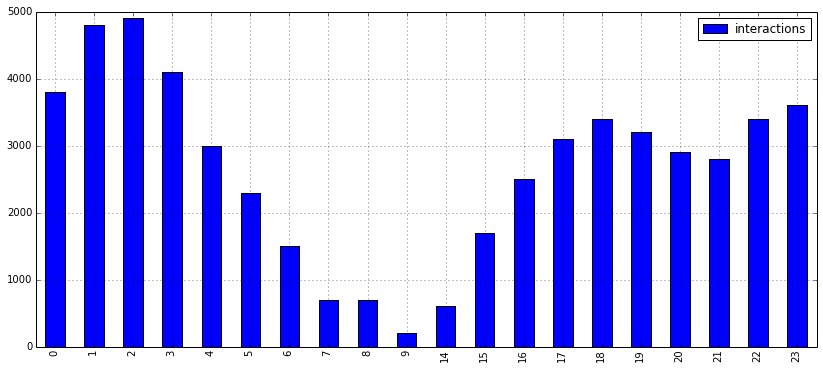

In [5]:
# Plots a time series, aggregated by count of interactions in each hour
def chart_aggregated_hourly_interactions(ts_result):

    # Check result is not redacted
    if not ts_result['analysis']['redacted']:

        # Extract result data to dataframe
        df = pd.DataFrame.from_records(ts_result['analysis']['results'],index='key',exclude=['unique_authors'])
        df.index=df.index.map(datetime.datetime.fromtimestamp)
        
        # Aggregate results by hour
        df = pd.DataFrame(df.groupby(df.index.map(lambda t: t.hour)).interactions.sum())

        # Sort the data and plot a chart
        df.sort_index().plot(kind='bar', figsize=(14,6))

chart_aggregated_hourly_interactions(ts_multi_days)

# What next?

Now you've learnt some basic charting skills take a look at the other examples in this repository, such as:
* [Charting PYLON Nested Query Analysis Results](Charting PYLON Nested Query Analysis Results.ipynb)
* [Charting PYLON Baselined Analysis Results](Charting PYLON Baselined Analysis Results.ipynb)